In [ ]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

# Update with the actual file path
geojson_filename = "pittsburgh_neighborhoods.geojson"
file_path = os.path.abspath(geojson_filename)
print(file_path)
# Verify the file exists before attempting to load it
if not os.path.exists(file_path):
    raise FileNotFoundError(f"GeoJSON file not found: {file_path}")

# Load the GeoJSON
gdf = gpd.read_file(file_path)
print("GeoJSON loaded successfully!")




show_labels = False



print("Available columns:", gdf.columns)




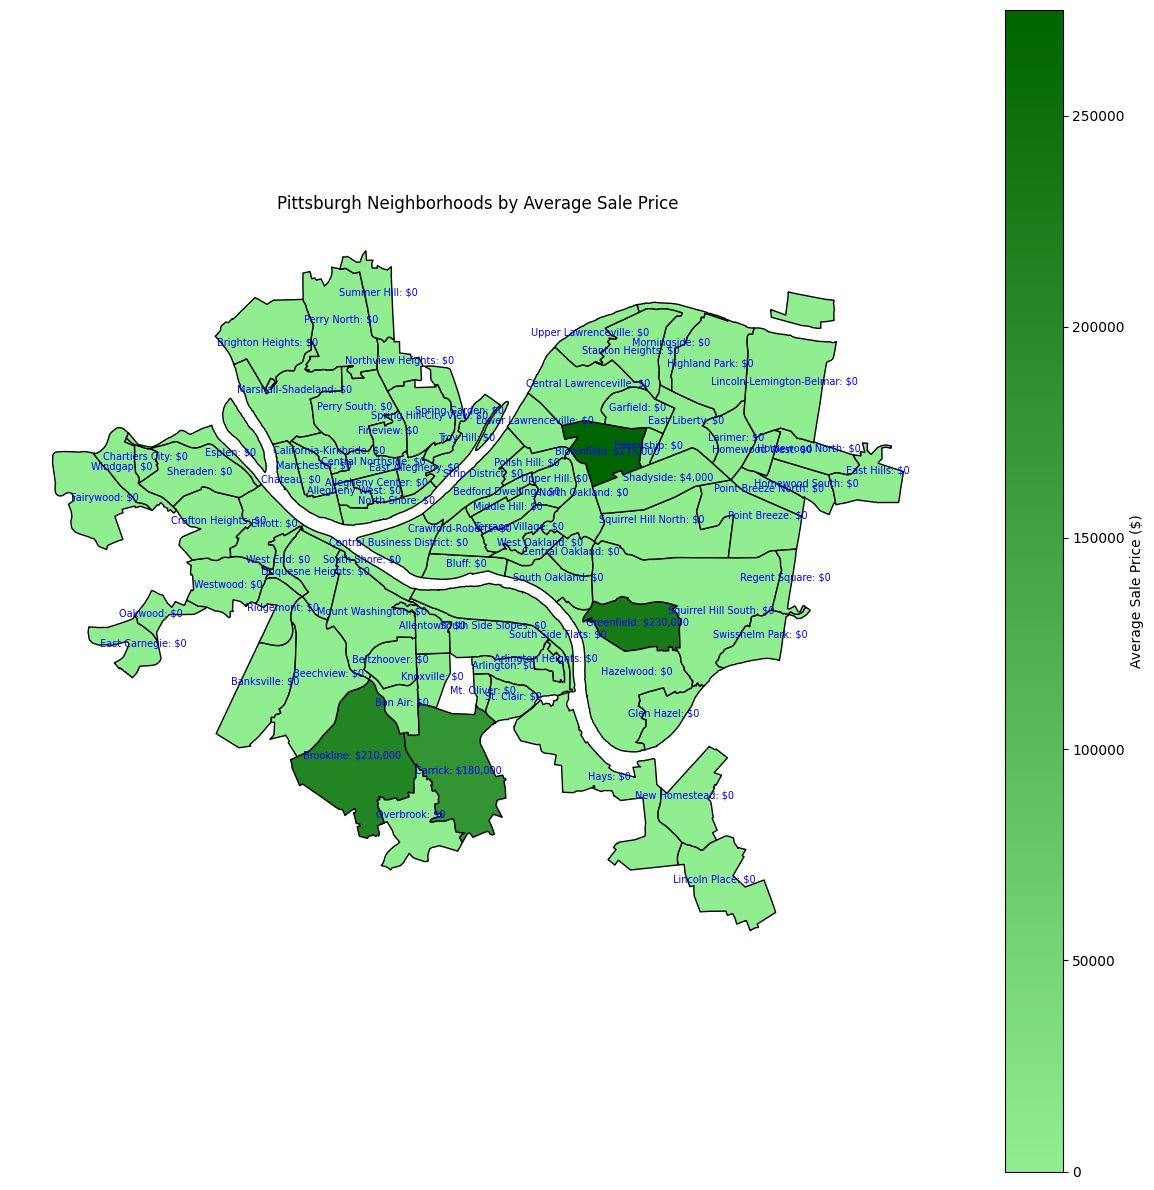

['Point Breeze North' 'Squirrel Hill North' 'Garfield' 'Bedford Dwellings'
 'Knoxville' 'Homewood South' 'Middle Hill' 'Oakwood' 'North Oakland'
 'Duquesne Heights' 'Glen Hazel' 'East Liberty' 'Westwood' 'Morningside'
 'Lincoln Place' 'Perry North' 'Northview Heights' 'Homewood North'
 'Arlington Heights' 'Lower Lawrenceville' 'Larimer'
 'Lincoln-Lemington-Belmar' 'Bluff' 'Fairywood' 'Brookline' 'Hays'
 'Beltzhoover' 'Greenfield' 'East Carnegie' 'North Shore' 'Allentown'
 'Bon Air' 'Allegheny West' 'Crafton Heights' 'Manchester'
 'Marshall-Shadeland' 'Highland Park' 'New Homestead' 'Central Northside'
 'Polish Hill' 'Overbrook' 'Friendship' 'Homewood West'
 'Central Business District' 'East Allegheny' 'Allegheny Center'
 'Central Oakland' 'Brighton Heights' 'South Side Slopes' 'Arlington'
 'Chartiers City' 'Carrick' 'Bloomfield' 'Banksville' 'Mount Washington'
 'East Hills' 'Central Lawrenceville' 'West End' 'Esplen' 'Point Breeze'
 'Hazelwood' 'Crawford-Roberts' 'South Oakland' 'Upper

In [35]:


# --- Manually define average sale prices ---
avg_price_dict = {
    "Shadyside": 4000,
    "Squirrel Hill": 400000,
    "Lawrenceville": 350000,
    "Brookline": 210000,
    "Carrick": 180000,
    "North Side": 260000,
    "Greenfield": 230000,
    "South Side": 290000,
    "Downtown": 370000,
    "Bloomfield": 275000,
    # Add more neighborhoods here...
}

name_col = "hood"

# --- Add avg_sale_price column by mapping the dictionary ---
gdf['avg_sale_price'] = gdf[name_col].map(avg_price_dict)
gdf['avg_sale_price'] = gdf['avg_sale_price'].fillna(0)  # Optional: fill missing values

# --- Recalculate min/max prices AFTER assigning data ---
min_price = gdf['avg_sale_price'].min()
max_price = gdf['avg_sale_price'].max()

# --- Create a custom colormap from light green to dark green ---
cmap = mcolors.LinearSegmentedColormap.from_list("green_gradient", ["lightgreen", "darkgreen"])
norm = mcolors.Normalize(vmin=min_price, vmax=max_price)

# --- Plot base map ---
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color=gdf['avg_sale_price'].apply(lambda x: cmap(norm(x))), edgecolor='black')

# --- Optional: Add labels with name and average sale price ---
if show_labels:
    for idx, row in gdf.iterrows():
        point = row.geometry.representative_point()
        label = f"{row[name_col]}: ${row['avg_sale_price']:,.0f}"
        ax.text(point.x, point.y, label, fontsize=7, ha='center', color='blue')

# --- Add colorbar ---
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array to initialize colorbar
fig.colorbar(sm, ax=ax, label='Average Sale Price ($)')

# --- Final touches ---
plt.title("Pittsburgh Neighborhoods by Average Sale Price")
plt.axis('off')
plt.tight_layout()
plt.show()
# Print neighborhoods without NaN values
print(gdf[name_col].dropna().unique())


In [ ]:
import os
import pandas as pd

# Specify your filename (make sure the file is in the same folder as the notebook)
filename = "Sales-transaction-2024.csv"  # File Name

# # Get the full path of the file in the current working directory
file_path = os.path.join(os.getcwd(), filename)


# Display the result
print(file_path)

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Ensure SALEDATE is in datetime format
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'], errors='coerce')





# Filter for transactions in 2024 and SALEPRICE > 400
filtered_df = df[(df['SALEDATE'].dt.year == 2024) & (df['PRICE'] > 400)]

# Group by SCHOOLDESC and count transactions
transaction_counts = filtered_df.groupby('SCHOOLDESC').size().reset_index(name='TransactionCount')

transaction_counts



c:\Users\JGao\Documents\GitHub\Big-Ideas-Group-Project\Jason_Gao\Sales-transaction-2024.csv


,SCHOOLDESC,TransactionCount
0,Allegheny Valley,165
1,Avonworth,192
2,Baldwin Whitehall,510
3,Bethel Park,406
4,Brentwood Boro,170
5,Carlynton,248
6,Chartiers Valley,644
7,Clairton City,214
8,Cornell,159
9,Deer Lakes,368


In [43]:
import geopandas as gpd
import os

def zip_to_neighborhoods(zip_code, neighborhood_geojson_file):
    """Converts a ZIP code to a list of Pittsburgh neighborhood names.

    Args:
        zip_code (int): The ZIP code of interest.
        neighborhood_geojson_file (str): The filename of the neighborhood GeoJSON file in the working directory.

    Returns:
        list[str]: A list of neighborhood names within that ZIP code.
    """
    # Load the ZIP code GeoJSON file directly from URL
    zips_gdf = gpd.read_file("https://data.wprdc.org/dataset/1a5135de-cabe-4e23-b5e4-b2b8dd733817/resource/ec228c0e-6b1e-4f44-a335-df05546d52ea/download/alcogisallegheny-county-zip-code-boundaries.zip")
    
    # Load the neighborhood GeoJSON file from the working directory
    neighborhoods_gdf = gpd.read_file(neighborhood_geojson_file)

    # Check CRS match and reproject if needed
    if zips_gdf.crs != neighborhoods_gdf.crs:
        neighborhoods_gdf = neighborhoods_gdf.to_crs(zips_gdf.crs)

    # Filter the specific zip code
    zips_filtered = zips_gdf[zips_gdf["ZIP"] == str(zip_code)]
    if zips_filtered.empty:
        return None
    
    # Get the geometry of the specified ZIP code
    zp_geometry = zips_filtered.geometry.iloc[0]

    # List of neighborhoods for this zip
    zp_neighborhoods = []

    # Loop through the neighborhoods and check for intersection
    for _idx, neighborhood in neighborhoods_gdf.iterrows():
        if neighborhood["geometry"].intersects(zp_geometry):
            # Add this neighborhood to the list
            zp_neighborhoods.append(neighborhood["hood"])
            print(neighborhood["hood"])
            

    return zp_neighborhoods

# Example usage:
zip_code = 15217

# Ensure correct file path
neighborhood_filename = "pittsburgh_neighborhoods.geojson"
file_path = os.path.abspath(neighborhood_filename)

# Pass the absolute file path
neighborhood_geojson_file = file_path

# Run the function and print results
neighborhoods = zip_to_neighborhoods(zip_code, neighborhood_geojson_file)
print("Neighborhoods:", neighborhoods)


Squirrel Hill North
Glen Hazel
Greenfield
Point Breeze
Hazelwood
Squirrel Hill South
Swisshelm Park
Regent Square
Neighborhoods: ['Squirrel Hill North', 'Glen Hazel', 'Greenfield', 'Point Breeze', 'Hazelwood', 'Squirrel Hill South', 'Swisshelm Park', 'Regent Square']


In [45]:
# Your existing code
import geopandas as gpd
from shapely.geometry import Point

# Load neighborhoods
NEIGHBORHOODS = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
# Load zip codes
ZIPS = gpd.read_file("https://data.wprdc.org/dataset/1a5135de-cabe-4e23-b5e4-b2b8dd733817/resource/ec228c0e-6b1e-4f44-a335-df05546d52ea/download/alcogisallegheny-county-zip-code-boundaries.zip")

def geo_to_neighborhood(latitude, longitude):
    """Converts a geolocation (latitude and longitude) to a Pittsburgh neighborhood name.

    Args:
        latitude (float): The latitude of the point.
        longitude (float): The longitude of the point.

    Returns:
        Union[str, None]: Name of the Pittsburgh neighborhood the point falls within or None if it does not fall within a neighborhood.
    """
    # Create a shapely point for the latitude and longitude
    pt = Point(longitude, latitude)
    # Loop through the neighborhoods
    for _idx, neighborhood in NEIGHBORHOODS.iterrows():
        # Check if this neighborhood contains the point
        if neighborhood["geometry"].contains(pt):
            # Return the name of the neighborhood
            return neighborhood["hood"]
    # Wasn't contained in the neighborhood
    return None

# Example usage, printing the neighborhood name

 
latitude = 40.44104058130783
longitude = -80.00265959390347
neighborhood = geo_to_neighborhood(latitude, longitude)
print(f"The neighborhood is: {neighborhood}")


The neighborhood is: None
